## Continuous Assessment II - Machine Learning Module

# Comparative Analysis of Patient's No-Show using Machine Learning algorithms
## KNN _vs_ Naive Bayes

### Lecturer: **David McQuaid**

#### Student: **Lais Carvalho** | student ID: 2019435

#### Date: April | 2021

## Notebook's Overview

This Jupyter Notebook constains the answers for the Continous Assessment II worth 40% of the final grade for Year 4 of the module Machine Learning for the course of Computing and Multimedia at CCT College Dublin.

The motivation behind this analysis is to corroborate the following hypothesis:
**Can we predict if a patient won’t show (no show) for an appointment?**


### Table of Contents

add ToC

## Summary
This report is divided in X parts:
1. Report
2. Preprocessing / Data Viz
3. Machine Learning models

# Report

## The problem
It is estimated that 30% of people make an appointment and do not show up. This can cause loads of issues but mainly causes money problems. This report aims to try and predict if a given patient would show up or not for an appointment. To make such prediction, the author performed data analysis on a dataset (described below) and implemented two distinct machine learning models, KNN and Naive Bayes. To follow, metrics for evaluation were set and the two algorithms were compared against stablished benchmarks. The conclusion is that (point which model is better/more efficient and why).

## The Data
> The data comes from [here](https://github.com/dovidburns/Doctor_Appointment_No_Shows/blob/master/Report_On_Predicting_Appointment_No_Show.pdf). `Describe the dataset` part.

The data used in this sample is obtained for the city of Vitoria, Brazil from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).

The dataset is one of the featured dataset of Kaggle and initially included 14 variables with close to 110,000 observations of total patient appointments gathered from various hospitals of the city. The neighbourhood variable displays the region where the hospital is located. The data is real (not simulated) from the appointment histories of the hospitals.

The data was initially posted on May, 2016 and last updated on August, 2017.

### Data Glossary (add more info about the featured columns)
+ `PatientId`:
+ `AppointmentID`:
+ `Gender`:
+ `ScheduledDay`:
+ `AppointmentDay`:
+ `Age`:
+ `Neighbourhood`:
+ `Scholarship`: this attribute indicates that the family receives social welfare from the Brazilian government. Families of very low-income may receive this benefit if their children is going to school and on schedule with their vaccinations.
+ `Hipertension`:
+ `Diabetes`:
+ `Alcoholism`:
+ `Handcap`:
+ `SMS_received`:
+ `No-show`:

### Desireable aditional data
It would have been useful to learn about the type of apointment, etc. (also on the report).

## Plan for the data
First of all, we will need to fix some inconsistencies on the dataset:
- `PatientID` will be converted from type `float` to `integer`;
- `ScheduledDay` and `AppointmentDay` will be converted from objects type to `datetime`
> NOTE 1: `AppointmentDay` has timestamps but they are all 00:00, so it is accetable to ignore it.
> Note 2: `ScheduledDay` has adjusted timestamps but those are not useful for what the model is trying to predict, hence, it will be ignored as well.
- Some columns have typos which will be corrected.

After such steps, the data will be ready to be explored.

# Exploratory Data Anaysis (EDA)

In [1]:
# exports the project dependencies to a requirements file
# pip freeze > requirements.txt

In [2]:
# supresses all warnings from notebook cells - in case warnings are over the top verbose
import warnings
# warnings.filterwarnings('ignore')

In [60]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
# load the data
df_raw = pd.read_csv('./data/Medical Appointment No Shows.csv')

In [5]:
# verify if the data has loaded | print the 5 first records in the dataset
df_raw.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<AxesSubplot:>

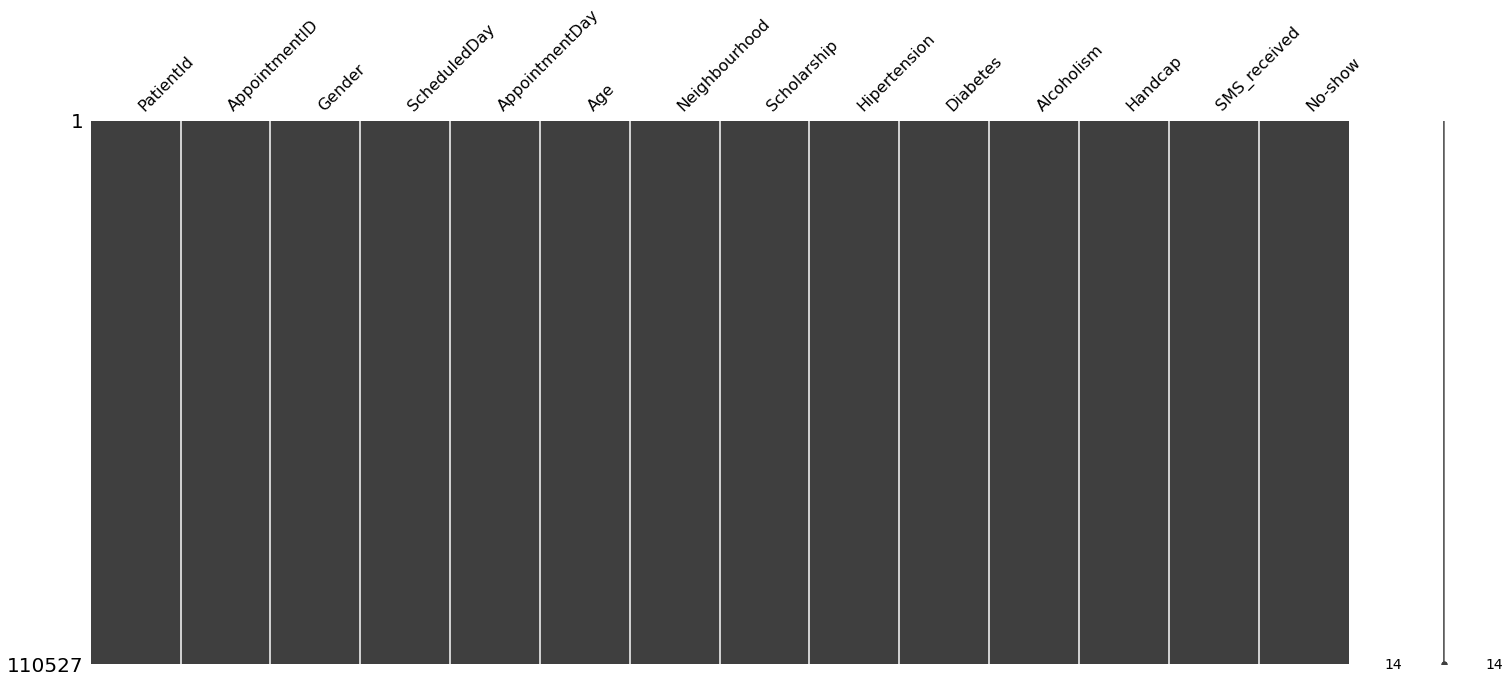

In [6]:
# check if the dataset has any missing values
msno.matrix(df_raw)

As it is possible to conclude by the plot above, the dataset given has **no missing values**.The shape of dataset is 110527 rows by 14 columns.

Further checks will scrutinise the memory usage of the dataset, typos on columns headings, the need to convert features from categorical to numerical values, etc.

In [7]:
# describes the values on the dataset
df_raw.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here it is possible to see that the feature `age` ranges from `-1` to `115`. Age indicated by a negative number can be assume to be a typo. Given the size of the dataset (more than 110000 records) it is acceptable to just drop the value. Newborns (babies with age = 0) should also have no chronical medical conditions such as Diabetes, Alcoholism and Hipertension.

Patient's health conditions have been encoded, already. As well as the `No-Show` feature (dependant variable).

To comply with GDPR,the dataset has been annonimised. Patient's names have been converted into randomly generated ID hashes. Finally, the dataset also describes if the patients are recipients or not of the government social welfare.

In [8]:
# number of people in the dataset older than a century
print('The number of people in the dataset older than a century:', df_raw[df_raw.Age > 100].shape[0])

The number of people in the dataset older than a century: 7


How many newborns (younger than 1 year of age) are in the dataset? 3539 babies.

In [9]:
df_newborn = df_raw[df_raw.Age == 0]
df_newborn

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


Now, let's make sure no newborns have chronical diseases. To do so, select all rows where `(Age < 0 and <chonic_desease> == '1')`. The expected output is _none_.

In [10]:
# babies with High blood pressure
df_newborn[df_newborn.Hipertension > 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
# return babies with diabetes
df_newborn[df_newborn.Diabetes > 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [12]:
# return alcoholic babies 
df_newborn[df_newborn.Alcoholism > 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [13]:
# return babies which are handicapped
df_newborn[df_newborn.Handcap > 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
98247,3.647246e+14,5788682,F,2016-06-08T13:18:12Z,2016-06-08T00:00:00Z,0,JABOUR,0,0,0,0,1,0,No


From the queries above it is possible to conclude that only one of the babies in the dataset is disabled and no babies have chronical diseases.

In [14]:
# drop the invalid age row (since the data has more than a hundred thousand records, dropping one invalid value will not be harmful)
df_raw = df_raw[df_raw.Age >= 0]

In [15]:
# function to convert features to integers
def convert_to_int(val):
    """
    Convert the string number value to a integer (int64)
    """
    new_val = val
    return int(new_val)

In [16]:
df_raw['PatientId'] = df_raw['PatientId'].apply(convert_to_int)

In [17]:
# convert object fields to `category` type to save memory (not used since converting it increses the dataset memory size in 2Mb)
# df_raw[df_raw.select_dtypes(['object']).columns] = df_raw.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [18]:
# convert AppointmentDay to datetime (has timestamp of 00:00 so it can be ignored)
df_raw['AppointmentDay'] = pd.to_datetime(df_raw['AppointmentDay']).dt.date.astype('datetime64[ns]')
df_raw['ScheduledDay'] = pd.to_datetime(df_raw['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [19]:
# convert `No-Show` feature to two distinct columns (dummy variables) where `1` indicates `True` and `0` indicates `False`
# df = pd.get_dummies(df_raw, columns=['No-show'])
# df.head(5)

In [20]:
# checks the memory usage of each column in the dataframe
# df.memory_usage(deep=True)

In [21]:
# rename column headers - get rid of typos
df_raw = df_raw.rename(columns={'PatientId': 'PatientID', 'Scholarship': 'Social_welfare', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'NoShow'})

The goal now will be to use the independent variables to predict the dependant variable (`No-Show`).Since the `class_label` is already on numerical form, there is no need to encode the feature.

As a way to reduce non-signifcant columns, the ID features `PatientID` and `AppointmentID` will be dropped. Since they are not relevant for what the model is trying to predict.

In [22]:
df_raw.drop(['PatientID', 'AppointmentID'], axis=1, inplace=True)

Next, we will use **one-hot encoder** to transform the categorical nominal feature `Neighbourhood` into a numerical one.

In [23]:
# assign weekday name for the dates on ScheduledDay and AppointmentDays
df_raw['ScheduledDay_wkday'] = df_raw['ScheduledDay'].dt.day_name()
df_raw['AppointmentDay_wkday'] = df_raw['AppointmentDay'].dt.day_name()

In [24]:
# calculate wait time feature (in days)
df_raw['Wait_time_days'] = df_raw['AppointmentDay'] - df_raw['ScheduledDay']
df_raw['Wait_time_days'] = df_raw['Wait_time_days'].dt.days

In [25]:
df_raw

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Social_welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,ScheduledDay_wkday,AppointmentDay_wkday,Wait_time_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday,35
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday,35
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,41
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,41


In [26]:
# calculate the percentage of patients who showed up and those who did not in the dataset
show = df_raw.groupby(['NoShow']).size()[0]/(df_raw.groupby(['NoShow']).size()[0]+df_raw.groupby(['NoShow']).size()[1])
print("The percent of Patients who showed up is: {:.2f}%".format(show*100))

noshow = df_raw.groupby(['NoShow']).size()[1]/(df_raw.groupby(['NoShow']).size()[0]+df_raw.groupby(['NoShow']).size()[1])
print("The percent of Patients who did NOT show up is: {:.2f}%".format(noshow*100))

The percent of Patients who showed up is: 79.81%
The percent of Patients who did NOT show up is: 20.19%


From the calculation above it is possible to conclude that one on every five appointments is a 'No Show'.

## Data Visualization
In order to better understand the dataset, the author made some plots with the data. The results can be found below.

### Show vs. NoShow (count)

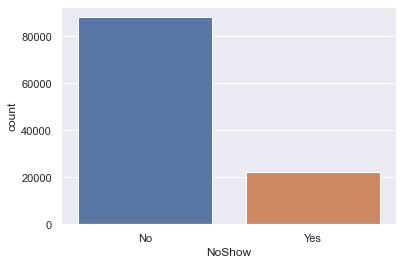

In [27]:
sns.set(style='darkgrid')
ax = sns.countplot(x=df_raw.NoShow, data=df_raw)

From this plot it is possible to conclude that the number of patients coming to appointments is much higher than the ones who do not (`Yes` NoShow column).

### Gender

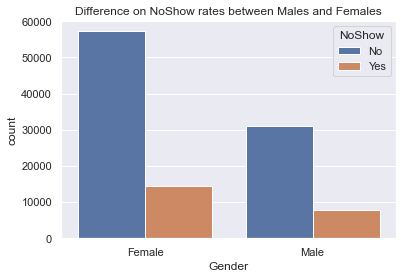

In [28]:
ax = sns.countplot(x=df_raw.Gender, hue=df_raw.NoShow, data=df_raw)
ax.set_title("Difference on NoShow rates between Males and Females")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the plot above it is possible to observe that:
+ Most of the patients in the dataset are females (57 thousand females vs. 30 thousand males)
+ Considering proportions, the ratios between genders NoShows is quite similar.

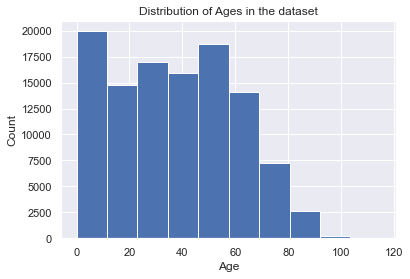

In [29]:
plt.hist(df_raw['Age'])
plt.title('Distribution of Ages in the dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Based on the histogram above, it is possible to conclude that the dataset is composed mostly of newborn patients. A significant amount of the patients is then between the ages of 18 and 62 years old.

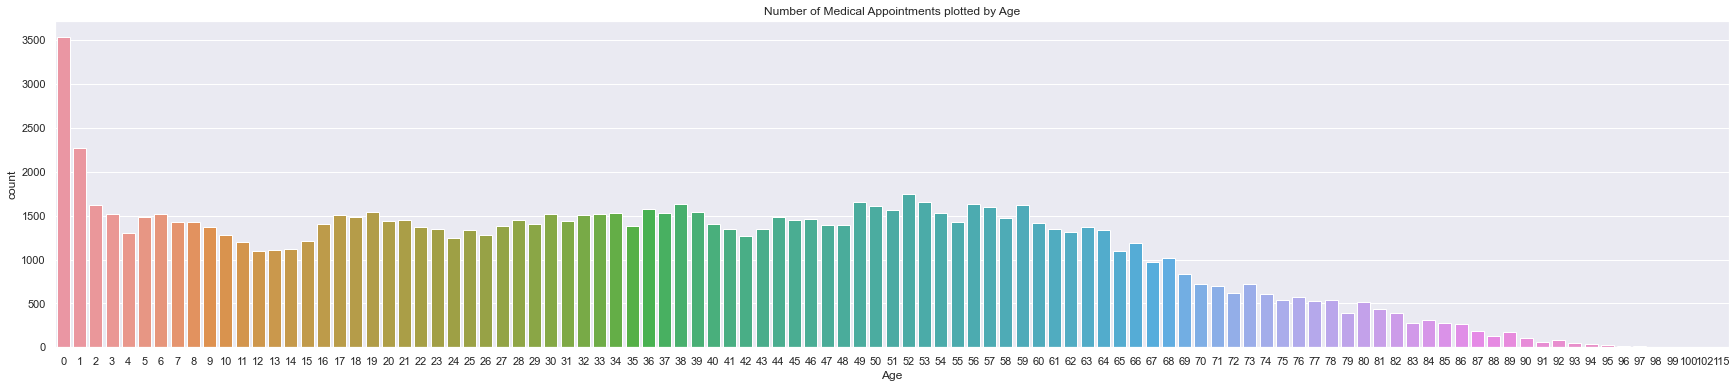

In [30]:
plt.figure(figsize=(30,6))
ax = sns.countplot(x=df_raw.Age)
ax.set_title("Number of Medical Appointments plotted by Age")
plt.show()

The graph shows a higher number of appointments for newborns and children up to 2 years of age. Then, the distribution becomes consistent until around the 60 years old, where it starts to drop giving the plot a sort of J-shape.

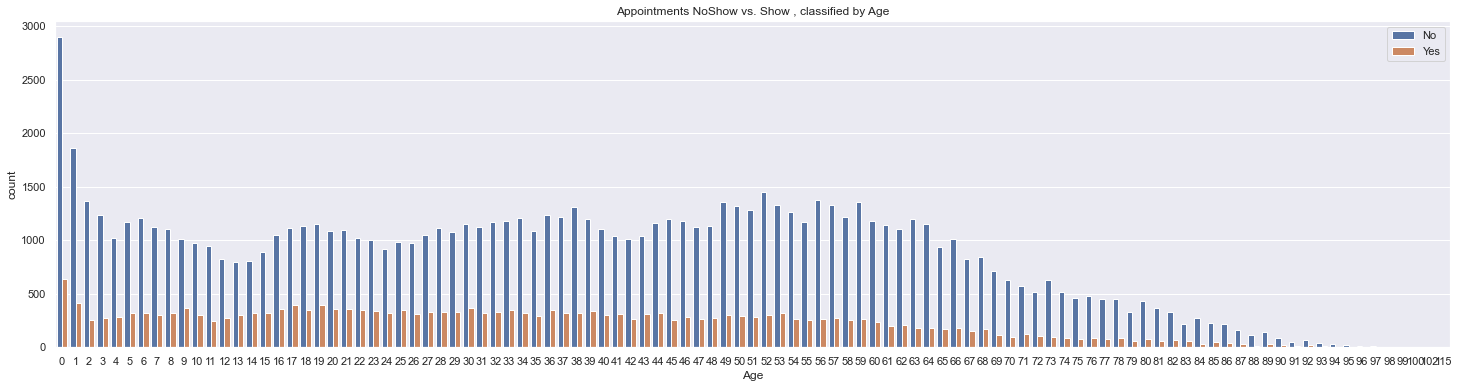

In [31]:
plt.figure(figsize=(25,6))
ax = sns.countplot(x=df_raw.Age, hue=df_raw.NoShow)
ax.set_title("Appointments NoShow vs. Show , classified by Age")
plt.legend(loc='upper right')
plt.show()

In [32]:
# calculate the age ratio of the patients in the dataset
df_age_ratio = df_raw[df_raw.NoShow == 'No'].groupby(['Age']).size()/df_raw.groupby(['Age']).size()

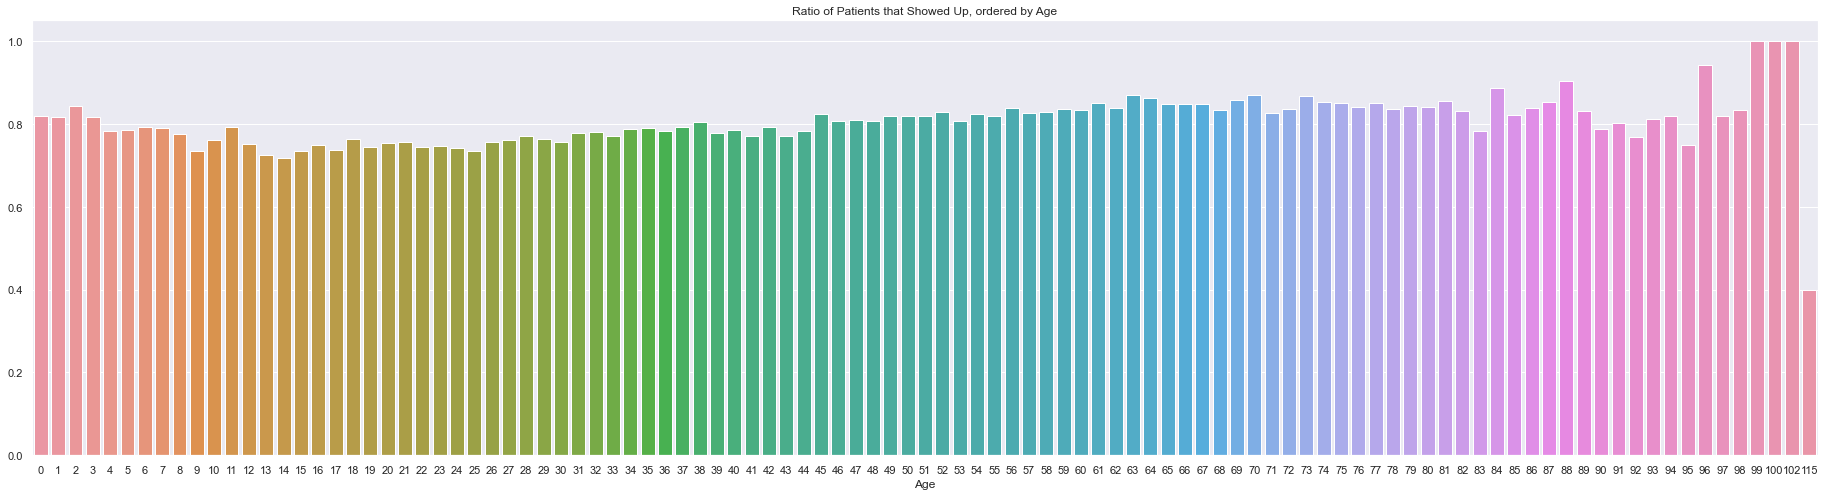

In [33]:
plt.figure(figsize=(32,8))
ax = sns.barplot(x=df_age_ratio.index, y=df_age_ratio)
ax.set_title("Ratio of Patients that Showed Up, ordered by Age")
plt.show()

From the plot above it is possible to conclude that on average 80% of the patients (from this dataset) show up for their medical appointments.

### Neighbourhood

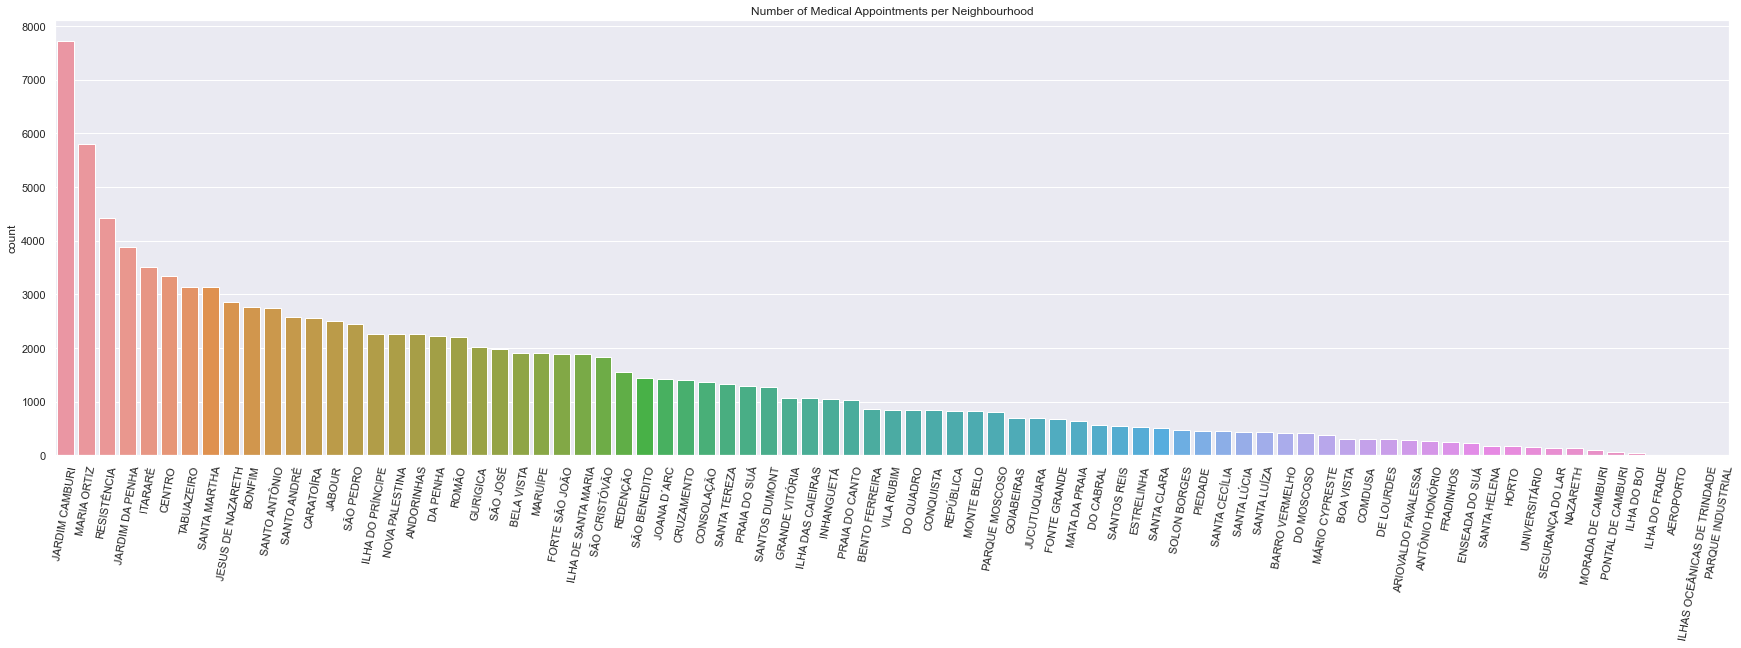

In [34]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=80)
ax = sns.countplot(x=np.sort(df_raw.Neighbourhood), order=df_raw['Neighbourhood'].value_counts().index)
ax.set_title("Number of Medical Appointments per Neighbourhood")
plt.show()

J-Shaped distribution, non-uniform and not necessarily significant.

### Social Welfare benefit

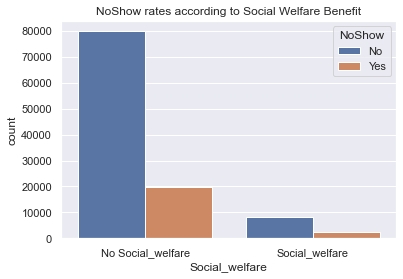

In [35]:
ax = sns.countplot(x=df_raw.Social_welfare, hue=df_raw.NoShow, data=df_raw)
ax.set_title("NoShow rates according to Social Welfare Benefit")
x_ticks_labels=['No Social_welfare', 'Social_welfare']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that:
+ there are around 100,000 patients without Scholarship and out of them around 80% have come for the visit.
+ Out of the 10,500 patients with Scholarship around 75% of them have come for the visit.

So, Scholarship feature could help us in determining if a patient will turn up for the visit after an appointment.

### Hypertension

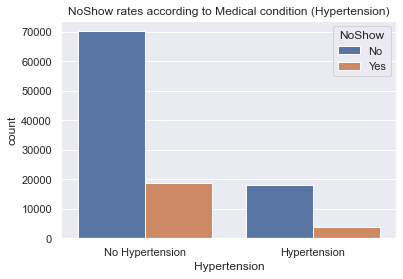

In [36]:
ax = sns.countplot(x=df_raw.Hypertension, hue=df_raw.NoShow, data=df_raw)
ax.set_title("NoShow rates according to Medical condition (Hypertension)")
x_ticks_labels=['No Hypertension', 'Hypertension']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [37]:
# number of people in the dataset with and without hypertension
print('Breakdown of Patients with High Blood Pressure\n')
print('Hypertense people:', df_raw[df_raw.Hypertension == 1].shape[0])

print('Non-hypertense people:', df_raw[df_raw.Hypertension == 0].shape[0])

Breakdown of Patients with High Blood Pressure

Hypertense people: 21801
Non-hypertense people: 88725


From the visualization above it is possible to conlude that:
+ Most patients in the dataset do not have high bloob pressure (around 80% of them).
+ Out of the 22,000 patients with Hypertension around 80% of them have come for the visit.

To summarise, the Hypertension feature is relevant when determining the likelihood of a patient showing up for a medical appointment.

### Diabetes

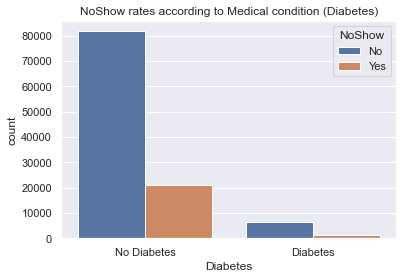

In [38]:
ax = sns.countplot(x=df_raw.Diabetes, hue=df_raw.NoShow, data=df_raw)
ax.set_title("NoShow rates according to Medical condition (Diabetes)")
x_ticks_labels=['No Diabetes', 'Diabetes']
ax.set_xticklabels(x_ticks_labels)
plt.show()

<font color='red'>
    From the above visualization we can see that:
        + there are around 102,000 patients without Diabetes and out of them around 80% have come for the visit.
        + Out of the 8,500 patients with Diabetes around 83% of them have come for the visit.
    
    So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.
</font>

### Alcoholism

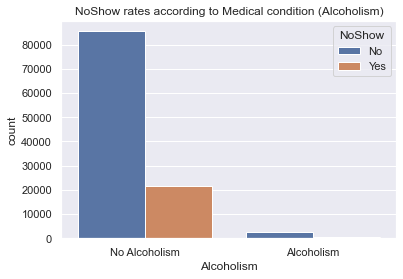

In [39]:
ax = sns.countplot(x=df_raw.Alcoholism, hue=df_raw.NoShow, data=df_raw)
ax.set_title("NoShow rates according to Medical condition (Alcoholism)")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

[red]
From the above visualization we can see that:
+ there are around 105,000 patients without Alcoholism and out of them around 80% have come for the visit.
+ Out of the 5,500 patients with Alcoholism around 80% of them have come for the visit.

As the percentage of visits for patients with and without Alcoholism is the same it may not help us in determining if a patient will come for a visit.

### Handicap

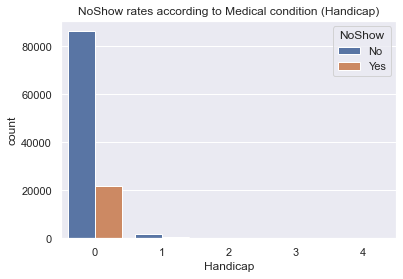

In [40]:
ax = sns.countplot(x=df_raw.Handicap, hue=df_raw.NoShow, data=df_raw)
ax.set_title("NoShow rates according to Medical condition (Handicap)")
plt.show()

From the above visualization we can see that:
+ there are around 110,000 patients without Handicap and out of them around 80% have come for the visit.
+ As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

### SMSReceived

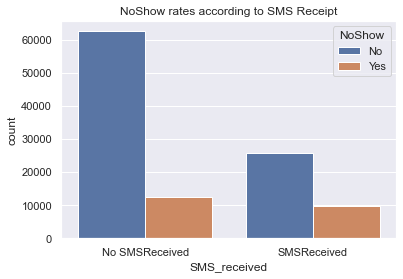

In [41]:
ax = sns.countplot(x=df_raw.SMS_received, hue=df_raw.NoShow, data=df_raw)
ax.set_title("NoShow rates according to SMS Receipt")
x_ticks_labels=['No SMSReceived', 'SMSReceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

From the above visualization we can see that:
+ there are around 75,000 patients who have not received SMS and out of them around 84% have come for the visit.
+ Out of the 35,500 patients who have received SMS around 72% of them have come for the visit. (This looks opposite to what usually happens. People who do receive a reminder SMS usually tend to visit the hospital more than those who haven't received an SMS. Or this could be an SMS that was recived while booking an appointment and could possibly have no correlation with the visit probability.)
As we can see a clear distinction between people reveiving SMS and not receiving SMS this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

### Scheduled Day of the Week

In [42]:
df_raw

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Social_welfare,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,ScheduledDay_wkday,AppointmentDay_wkday,Wait_time_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday,35
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,Tuesday,35
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,41
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,Wednesday,Tuesday,41


In [43]:
week_days = ['Monday','Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

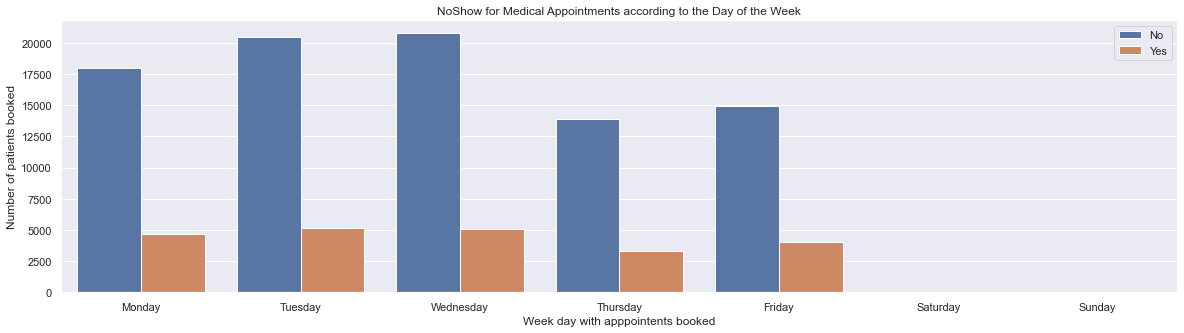

In [44]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df_raw.AppointmentDay_wkday, hue=df_raw.NoShow, order=week_days)
ax.set_title("NoShow for Medical Appointments according to the Day of the Week")
ax.set_xlabel('Week day with apppointents booked')
ax.set_ylabel('Number of patients booked')
plt.legend(loc='upper right')
plt.show()

In general, it seems safe to conclude that the ratio of no shows is the same for any weekday. Moreover, Tuesdays and Wednesdays are the days with higher rates of NoShows, those are also the days with the highest number of bookings. Hence, this feature will not be helpful on helping to determine the probability of patient's NoShow.

### Wait-time

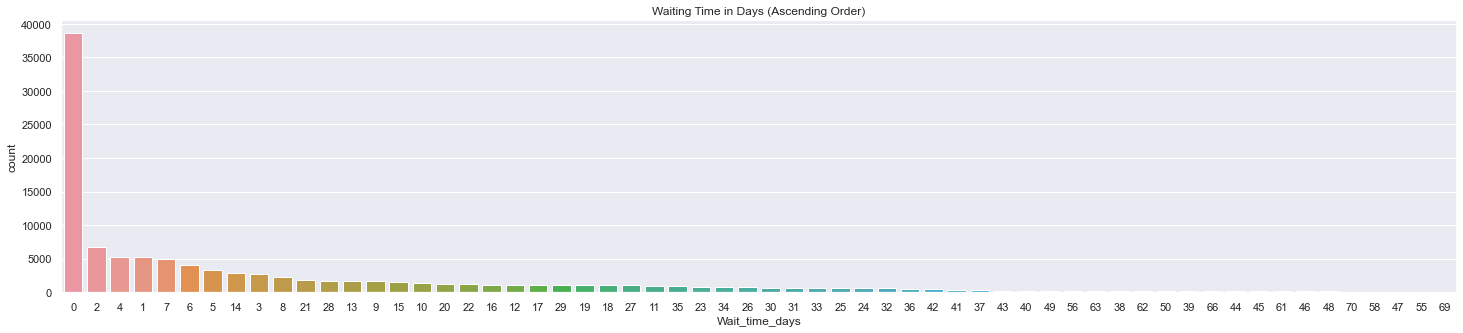

In [45]:
plt.figure(figsize=(25,5))
ax = sns.countplot(x=df_raw.Wait_time_days, order=df_raw.Wait_time_days.value_counts().iloc[:60].index)
ax.set_title("Waiting Time in Days (Ascending Order)")
plt.show()

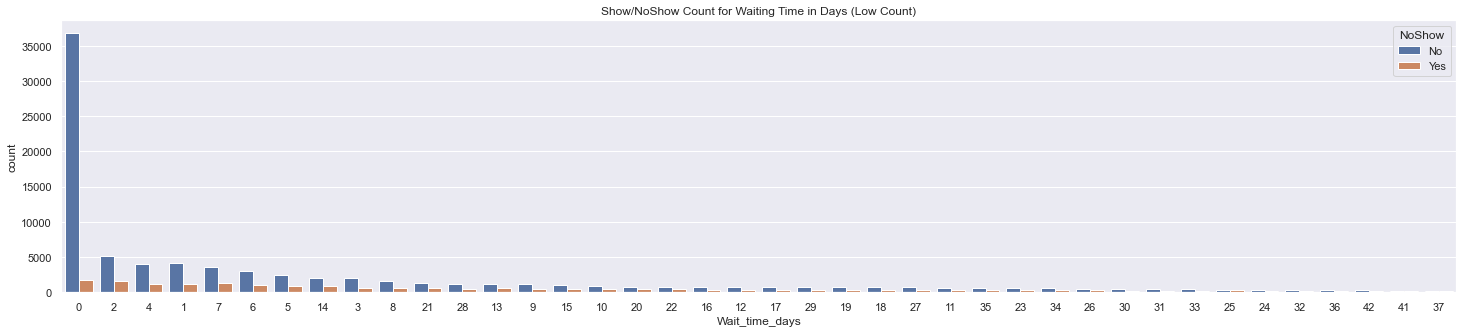

In [46]:
plt.figure(figsize=(25,5))
ax = sns.countplot(x=df_raw.Wait_time_days, hue=df_raw.NoShow, order=df_raw.Wait_time_days.value_counts(ascending=False).iloc[:40].index)
ax.set_title("Show/NoShow Count for Waiting Time in Days (Low Count)")
plt.show()

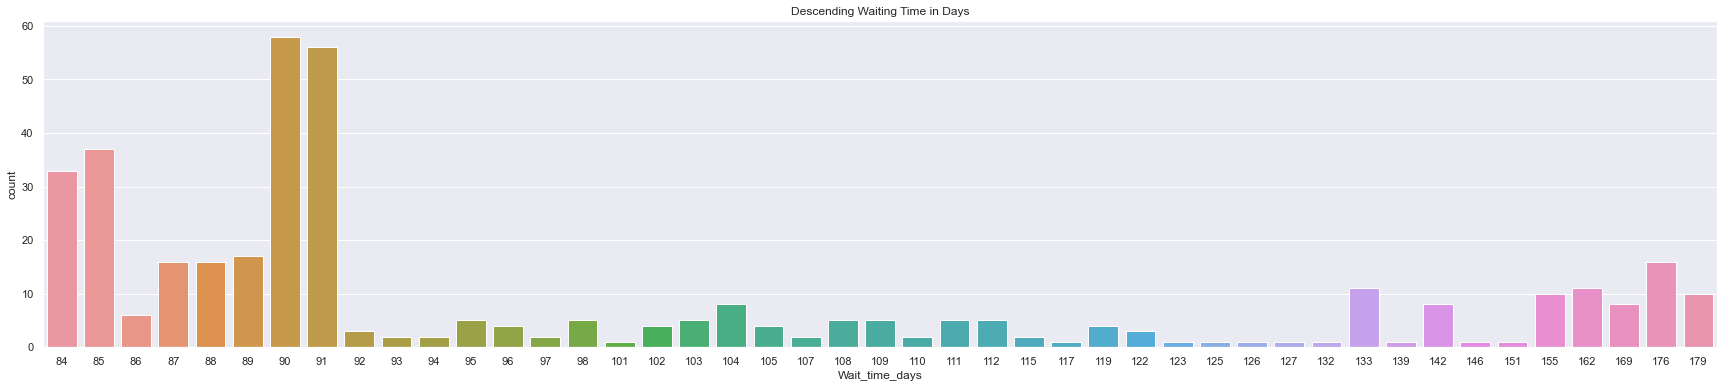

In [47]:
plt.figure(figsize=(30,6))
ax = sns.countplot(x=df_raw[['Wait_time_days']].sort_values('Wait_time_days', ascending=False).Wait_time_days.iloc[:400])
ax.set_title("Descending Waiting Time in Days")
plt.show()

To conclude,

# Machine Learning Models

## Pre-processing

the columns need to be hot encoded.

In [48]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [49]:
# Use `LabelEncoder` to encode labels with value between 0 and n_classes-1.
#Gender
le = preprocessing.LabelEncoder()
df_raw['Gender'] = le.fit_transform(df_raw['Gender'])
#Neighbourhood
le = preprocessing.LabelEncoder()
df_raw['Neighbourhood'] = le.fit_transform(df_raw['Neighbourhood'])
#ScheduledDay_DOW
le = preprocessing.LabelEncoder()
df_raw['ScheduledDay_wkday'] = le.fit_transform(df_raw['ScheduledDay_wkday'])
#AppointmentDay_DOW
le = preprocessing.LabelEncoder()
df_raw['AppointmentDay_wkday'] = le.fit_transform(df_raw['AppointmentDay_wkday'])
print("LabelEncoder Completed")

#NoShow
le = preprocessing.LabelEncoder()
df_raw['NoShow'] = le.fit_transform(df_raw['NoShow'])

LabelEncoder Completed


In [50]:
# spilt scheduled_day column to year, month and day
df_raw['ScheduledDay_Y'] = df_raw['ScheduledDay'].dt.year
df_raw['ScheduledDay_M'] = df_raw['ScheduledDay'].dt.month
df_raw['ScheduledDay_D'] = df_raw['ScheduledDay'].dt.day
df_raw.drop(['ScheduledDay'], axis=1, inplace=True)

In [51]:
# spilt appointment column to year, month and day
df_raw['AppointmentDay_Y'] = df_raw['AppointmentDay'].dt.year
df_raw['AppointmentDay_M'] = df_raw['AppointmentDay'].dt.month
df_raw['AppointmentDay_D'] = df_raw['AppointmentDay'].dt.day
df_raw.drop(['AppointmentDay'], axis=1, inplace=True)### Classification - K-Nearest Neighbours (requires scalling - Euclidean distances)

In [52]:
# set dependent and independent features
X = df_raw.drop(['NoShow'], axis=1).values
y = df_raw['NoShow'].values
f"Shape of X={X.shape}, y{y.shape}, #NoShows={y.sum()}"

'Shape of X=(110526, 18), y(110526,), #NoShows=22319'

Here, it is important to note that the dataset is unbalanced, since 80% of the patients did show up for their medical appointment.

In [53]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models

## Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression(class_weight={0:1, 1:2}, max_iter=1000) # assign double weight to noshow cases so we improve model accuracy
f"Linear regression predicts {model_lg.fit(X, y).predict(X).sum()} out of 22,319 noshow reports" # train and fit the model

'Linear regression predicts 9513 out of 22,319 noshow reports'

## Grid Search - to improve (and check) model accuracy

In [55]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1, 1:i} for i in range (1,4)]},
    cv=4, #number of cross valiadations
    n_jobs=-1 # allows to concurrenrtly run
)
gs.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [56]:
# verify the scores for the model (calculated by the bound method of the model)
grid = gs.cv_results_
pd.DataFrame(grid)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,4.041889,1.215610,0.009730,0.002391,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.794731,0.795599,0.778763,0.796424,0.791379,0.007309,1
1,3.264438,0.665615,0.008796,0.000683,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.765091,0.767371,0.755383,0.761464,0.762327,0.004529,2
2,3.171243,0.684027,0.004914,0.001303,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.701397,0.701035,0.704860,0.701133,0.702106,0.001596,3


From the dataframe above it is possible to see that the `mean_test_score` returns the mean accuracy of the given test data and labels - i.e., the scores for the models with different class_weights is maximum of 79% using Linear Regression.

### Classification - K-Nearest Neighbours (requires scalling - Euclidean distances)

KNN is a **supervised lazy classifier** with local heuristics. Not recommended for prediction in real time, KNN has complexity of O(n^2). If the problem proposed focuses on finding similarity between observations, KNN is a good choice due to its inherent nature to optimise the local minimum. Note that outliers can kill this algorithm's performance.
KNN is likely to overfit, so adjusting 'k' to maximise test set performance is a good way to proceed. Due to quadratic order of complexity, this model requires dimensionality reduction (use tecniques such as SVD or PCA).

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,
    p=2,
    metric='minkowski'
)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [61]:
print(confusion_matrix(y_test, y_pred))

[[16271  1444]
 [ 3478   913]]


### Classification - Naive Bayes

This is a so called **eager learning classifier**. Of order _O(nK)_, where **n** is the number of features and **K** is the number of label classes. This algorithm naively assumes complete independence between features, consequently, it is quick to learn how to deal with high dimensional features with limited training data when compared to other methods.

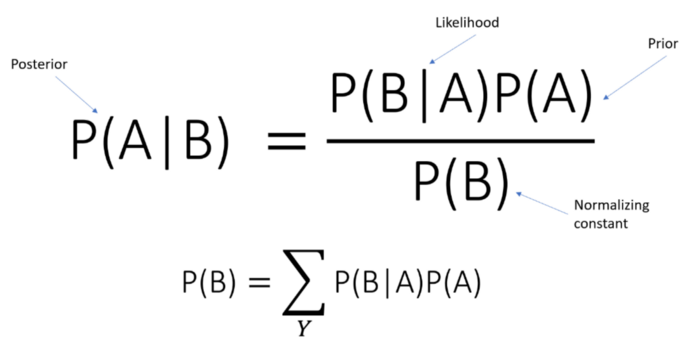

[Source](https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41): Image taken from www.i2tutorials.com

#### Feature Scalling

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [64]:
# predict the model results
y_pred = classifier.predict(X_test)

In [65]:

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
f"The Gaussian Naive Bayes accuracy score is {round(ac*100, 2)}% or {round(ac, 2)}."

'The Gaussian Naive Bayes accuracy score is 76.84% or 0.77.'

In [66]:
grid_gnb = GridSearchCV(
    estimator=GaussianNB(),
    param_grid={},
    cv=4, #number of cross valiadations
    n_jobs=-1 # allows to concurrenrtly run
)
grid_gnb.fit(X, y)

GridSearchCV(cv=4, estimator=GaussianNB(), n_jobs=-1, param_grid={})

In [67]:
# verify the scores for the model (calculated by the bound method of the model)
results = pd.DataFrame(grid_gnb.cv_results_)
print("The Accuracy score for the Gaussian Naive Bayes model is:" , results['mean_test_score'],"%")

The Accuracy score for the Gaussian Naive Bayes model is: 0    0.768091
Name: mean_test_score, dtype: float64 %


#### Multinomial NB

In [68]:
# implememtation of Multinomial Naive Bayes
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import make_scorer

# classifier_mnb =  MultinomialNB()
# classifier_mnb.fit(y_train, X_train).reshape(-1, 1)

In [69]:

# print('Accuracy:', round(accuracy_score(y_test, 
#                                         clf.predict(X_test)), 2) * 100, '%')

In [70]:
# preemp Accucracy score graph
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs_nb = GridSearchCV(GaussianNB(),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, refit='AUC', return_train_score=True)
print(gs)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})


#### Acuracy

### Prediction - KNN _vs_ Naive Bayes

#### Comparison

## Conclusions
### LImitations
From the data we can see that the AppointmentDay spans just over a month which means that we were given only a snapshot of complete data. Though there are no null values in the data, making exact predictions and analysis on a snapshot data is difficult and the analysis might not make a representation of the whole data.

Another very important thing that was missing from the data is the Time details in the AppointmentDay which would really help us a lot in predicting NoShow of a patient. As we have the time detail for ScheduledDay, we should have saved the similar thing in AppointmentDay also and not just normalize it.

Also, a reason for the appointment and the consultation doctor specialization would have helped us a lot in making better analysis and predictions for the NoShow of a patient.

### Findings
From the above feature importance, we could see that Gender, Age, Neighbourhood, Scholarship and Hypertension are some of the top features that would help us determine if the patient who has taken an appointment will Show/NoShow.

# References
- https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model
- https://www.jeremyjordan.me/preparing-data-for-a-machine-learning-model/
- https://www.kaggle.com/samratp/predict-show-noshow-eda-visualization-model
- https://www.kaggle.com/somrikbanerjee/predicting-show-up-no-show
- https://www.kaggle.com/joniarroba/noshowappointments
- https://www.kaggle.com/ravishkalra/medical-appointment-no-show-prediction
- https://www.linkedin.com/pulse/how-predict-no-show-analysis-appointment-rates-brazilian-burns/
    - https://github.com/dovidburns/Doctor_Appointment_No_Shows/blob/master/Report_On_Predicting_Appointment_No_Show.pdf
- https://medium.com/analytics-vidhya/no-shows-prediction-at-hospital-clinics-d6fe00165842

## Pandas Profilling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
# profile = ProfileReport(df_new, title="Pandas Profiling Report")
# profile.to_widgets()